In [ ]:
!pip install tensorflow


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
 # Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13] #iloc means index number
y = dataset.iloc[:, 13] #rows,columns

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)  #OHE is carried out and drop first basically drops the first comlumn
#Ex: here germany,france and  spain are there.Germany will be expressed as (1,0),spain will be expressed as (0,1) and france will be exp as (0,0) so one less column.
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)  # this combines the OHE(geo,gen) with the indipendent feat
#axis=1  means the concatinating column wise
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1) # since we OHE both these columns we can remove both of them

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''
Q.For which all algos is feature scaling req?
A.Req for ANN,LR,KNN,Kmeans .In short whenever  it is distance based and has Grad desc.
'''

'\nQ.For which all algos is feature scaling req?\nA.Req for ANN,LR,KNN,Kmeans .In short whenever  it is distance based and has Grad desc.\n'

In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout
'''
Taking the entire NN as a block we use seq so for forward and back prop we use
We use dense we create neurons in the hidden layer,output layer etc
Leaky relu etc are just the activation funcs
Drop out is  used to reduce overftting.We provide a number say 0.3 then in a given layer 30% of the neurons will deactivate.
'''


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))
#no. of inputs should be equal to no. of nodes in input layer
classifier.add(Dropout(0.3))


In [ ]:
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))


In [ ]:
#  creating second hidden layer and adding it to i/p layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Creating the o/p layer and adding to seq
classifier.add(Dense(units=1,activation='sigmoid')) #since binary class o/p has to be sigmoid and only 1 o/p layer

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])# by default the  learning rate starts at  0.01

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=30)

Epoch 1/30
536/536 [==============================] - 9s 9ms/step - loss: 0.6011 - accuracy: 0.8494 - val_loss: 0.5503 - val_accuracy: 0.8440
Epoch 2/30
536/536 [==============================] - 4s 7ms/step - loss: 0.4923 - accuracy: 0.8668 - val_loss: 0.4754 - val_accuracy: 0.8595
Epoch 3/30
536/536 [==============================] - 4s 7ms/step - loss: 0.4359 - accuracy: 0.8673 - val_loss: 0.4326 - val_accuracy: 0.8535
Epoch 4/30
536/536 [==============================] - 4s 8ms/step - loss: 0.4027 - accuracy: 0.8634 - val_loss: 0.4098 - val_accuracy: 0.8516
Epoch 5/30
536/536 [==============================] - 4s 7ms/step - loss: 0.3800 - accuracy: 0.8684 - val_loss: 0.3986 - val_accuracy: 0.8474
Epoch 6/30
536/536 [==============================] - 4s 7ms/step - loss: 0.3655 - accuracy: 0.8694 - val_loss: 0.3873 - val_accuracy: 0.8535
Epoch 7/30
536/536 [==============================] - 4s 8ms/step - loss: 0.3551 - accuracy: 0.8670 - val_loss: 0.3880 - val_accuracy: 0.8455
Epoch 

In [ ]:
'''
Early Stopping

basically when given metrix dosent get better it stops training
'''

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


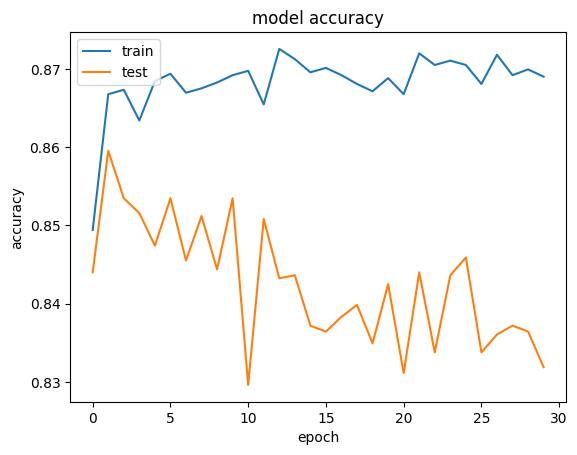

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

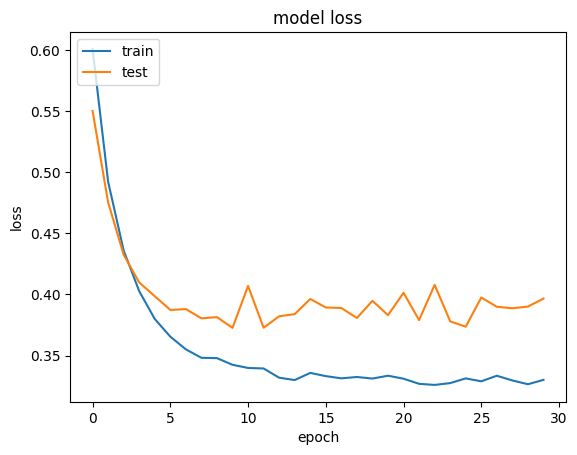

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1582,   13],
       [ 309,   96]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.839

Black Box Model v/s White Box Model

Random forrest,ANN,XgBoost-->Black Box Model<br>
Decision Tree,Linear reg--> White Box Model

Black models are hard to observe what is happening within the model itslef as there is alot happening while white box model